**Problem 1A**

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim


# Dataset Given in the Lecture
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Model Defined
def model(t_u, w1, w2, b):
    return w2*t_u**2 + w1*t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices, val_indices)

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u
train_loss_list = []
val_loss_list = []

def training_loop(n_epochs, optimizer, params, train_t_u, train_t_c, val_t_u, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        val_loss_list.append(val_loss.item())

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        train_loss_list.append(train_loss.item())

        if epoch <= 1 or epoch % 500 ==0:
            #epoch_list.append(epoch)
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, "f"Validation loss {val_loss.item():.4f}")

    return params

dir(optim)
t_un = 0.1 * t_u


tensor([4, 5, 0, 2, 6, 8, 1, 3, 9]) tensor([ 7, 10])


**Problem 1B**

Epoch 1, Training loss 694.4211, Validation loss 591.9736
Epoch 500, Training loss 2.4707, Validation loss 6.6334
Epoch 1000, Training loss 2.4237, Validation loss 5.8945
Epoch 1500, Training loss 2.3708, Validation loss 5.0249
Epoch 2000, Training loss 2.3218, Validation loss 4.1610
Epoch 2500, Training loss 2.2839, Validation loss 3.4118
Epoch 3000, Training loss 2.2596, Validation loss 2.8404
Epoch 3500, Training loss 2.2473, Validation loss 2.4570
Epoch 4000, Training loss 2.2426, Validation loss 2.2310
Epoch 4500, Training loss 2.2413, Validation loss 2.1152
Epoch 5000, Training loss 2.2411, Validation loss 2.0656


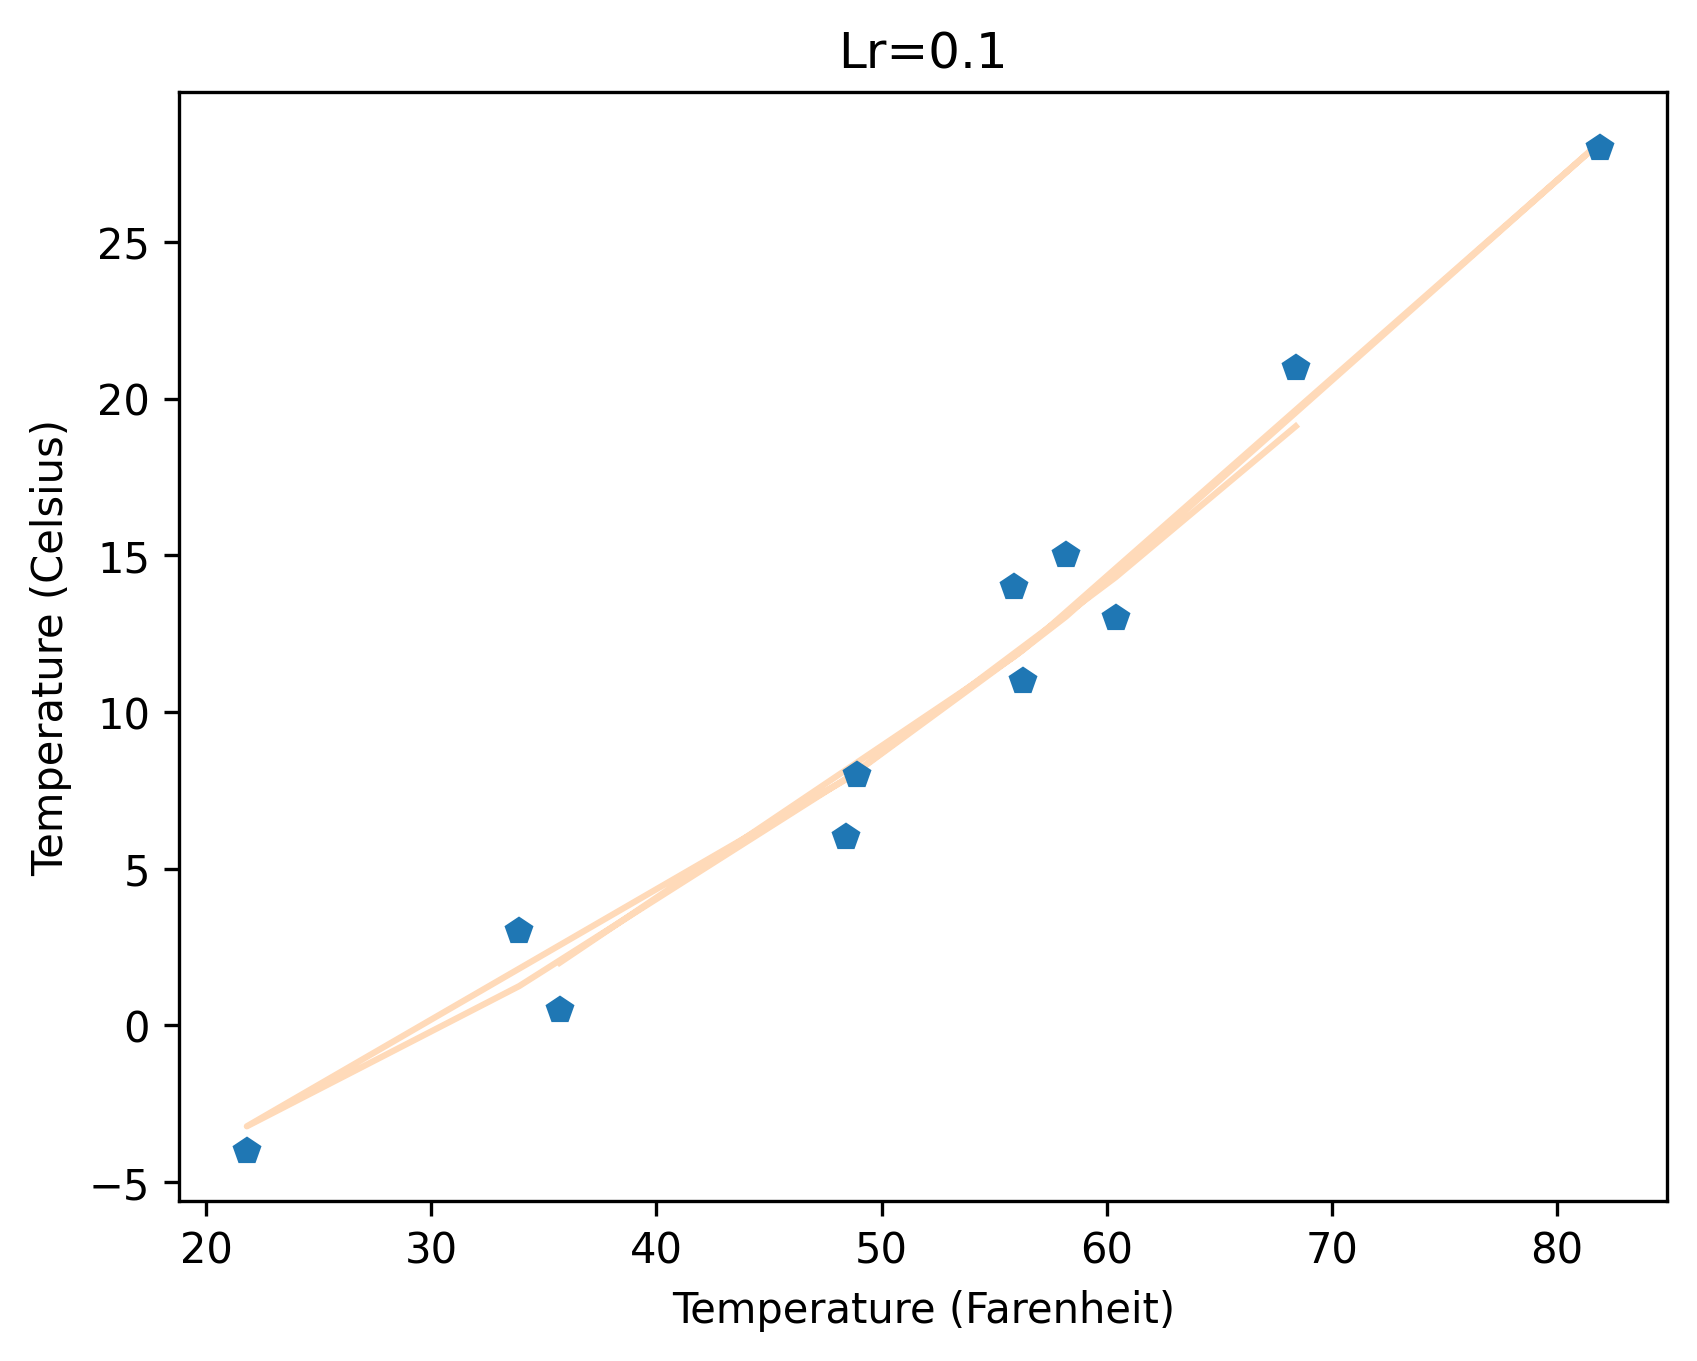

In [4]:

# Learning Rate = 0.1
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)
t_p = model(t_un, *params)

# Plot the loss
fig = plt.figure(dpi=300)
plt.title("Lr=0.1")
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='peachpuff',)
plt.plot(t_u.numpy(), t_c.numpy(), 'p')



Epoch 1, Training loss 703.1406, Validation loss 552.7359
Epoch 500, Training loss 6.0442, Validation loss 5.6641
Epoch 1000, Training loss 3.6921, Validation loss 4.3899
Epoch 1500, Training loss 2.9084, Validation loss 3.8932
Epoch 2000, Training loss 2.7458, Validation loss 3.7534
Epoch 2500, Training loss 2.6800, Validation loss 3.7034
Epoch 3000, Training loss 2.6095, Validation loss 3.6688
Epoch 3500, Training loss 2.5265, Validation loss 3.6331
Epoch 4000, Training loss 2.4318, Validation loss 3.5938
Epoch 4500, Training loss 2.3279, Validation loss 3.5522
Epoch 5000, Training loss 2.2192, Validation loss 3.5107


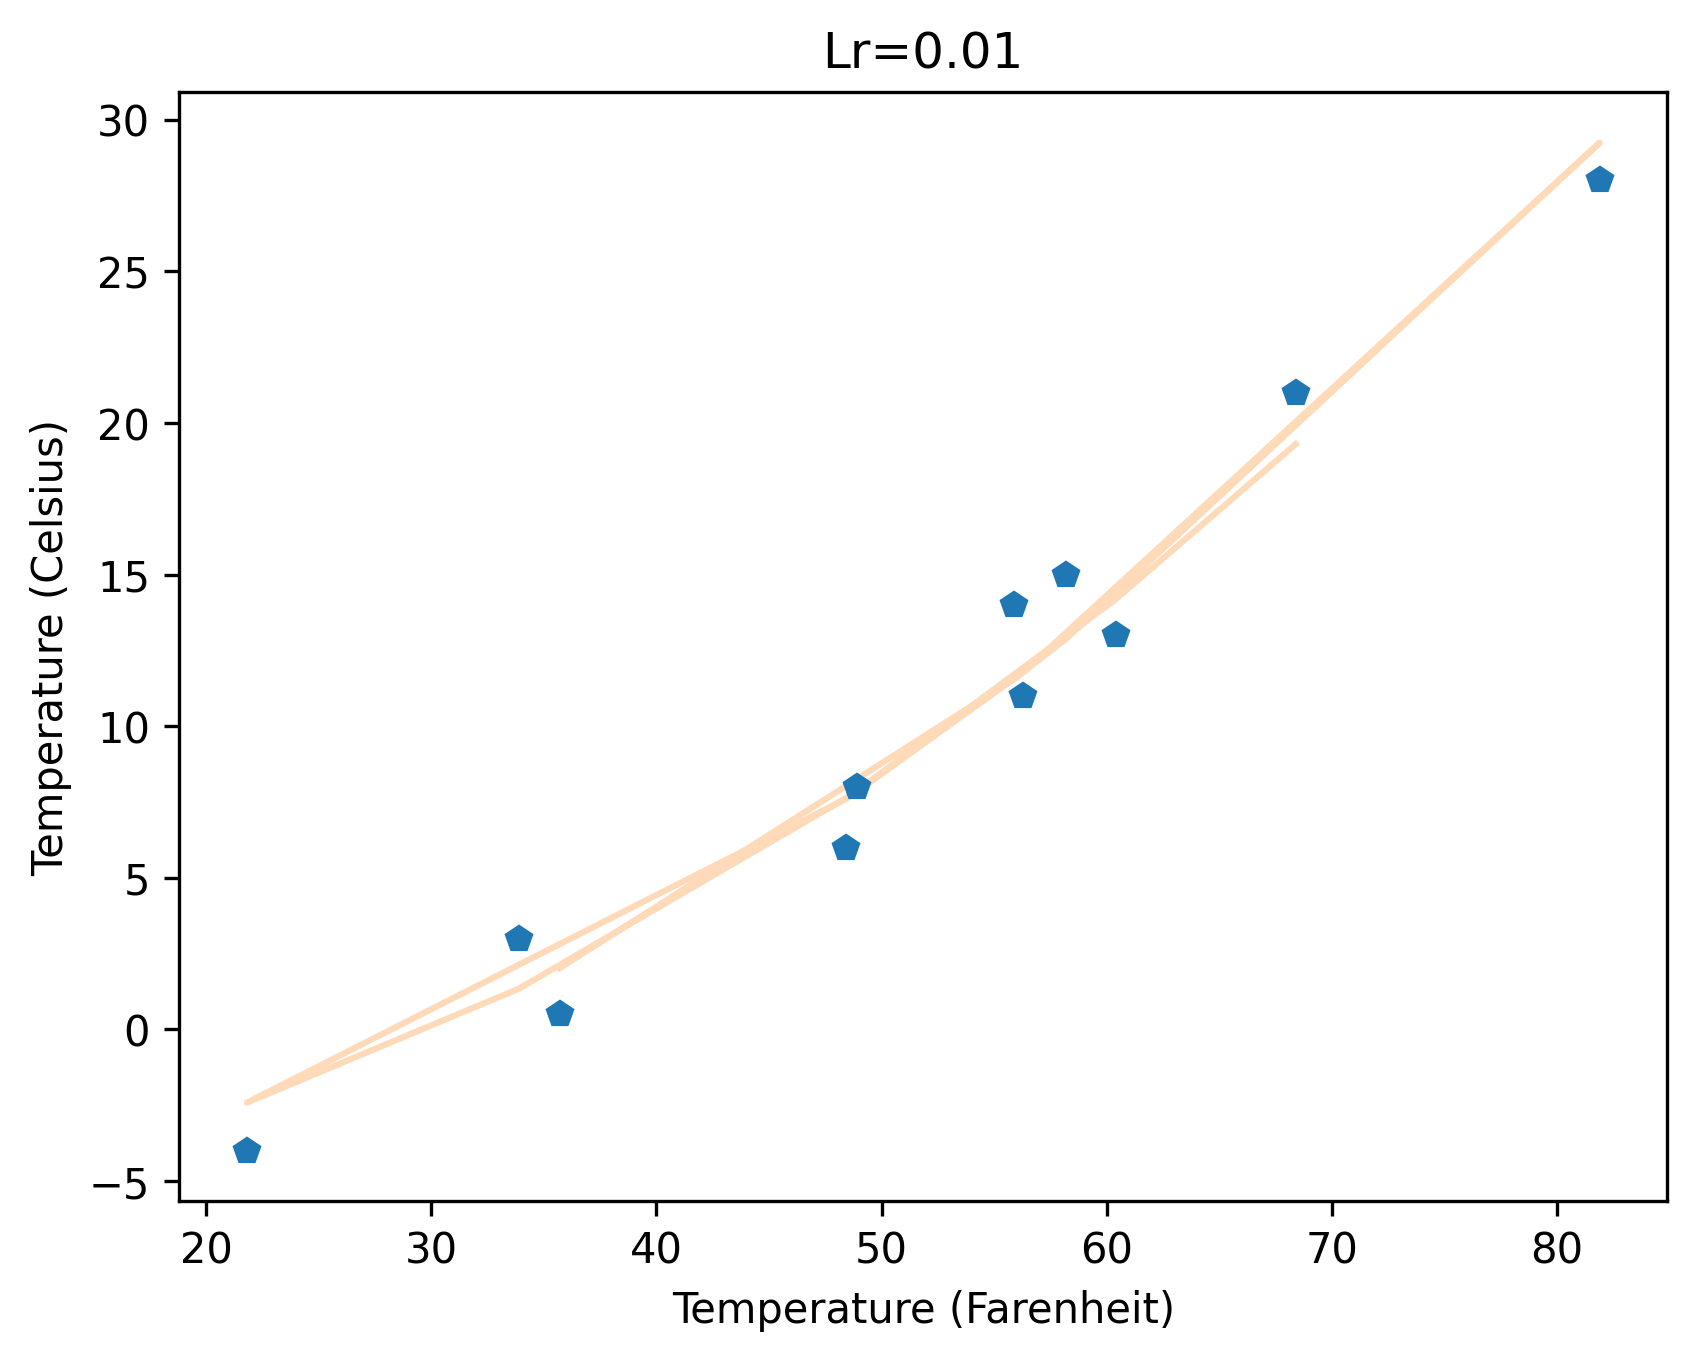

In [ ]:
# Learning Rate = 0.01

params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=300)
plt.title("Lr=0.01")

plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='peachpuff',)
plt.plot(t_u.numpy(), t_c.numpy(), 'p')

Epoch 1, Training loss 703.1406, Validation loss 552.7359
Epoch 500, Training loss 107.1300, Validation loss 90.3550
Epoch 1000, Training loss 13.3755, Validation loss 12.6365
Epoch 1500, Training loss 8.3058, Validation loss 7.0466
Epoch 2000, Training loss 7.8723, Validation loss 6.6124
Epoch 2500, Training loss 7.4106, Validation loss 6.3689
Epoch 3000, Training loss 6.8724, Validation loss 6.0925
Epoch 3500, Training loss 6.2726, Validation loss 5.7817
Epoch 4000, Training loss 5.6365, Validation loss 5.4477
Epoch 4500, Training loss 4.9986, Validation loss 5.1070
Epoch 5000, Training loss 4.3996, Validation loss 4.7795


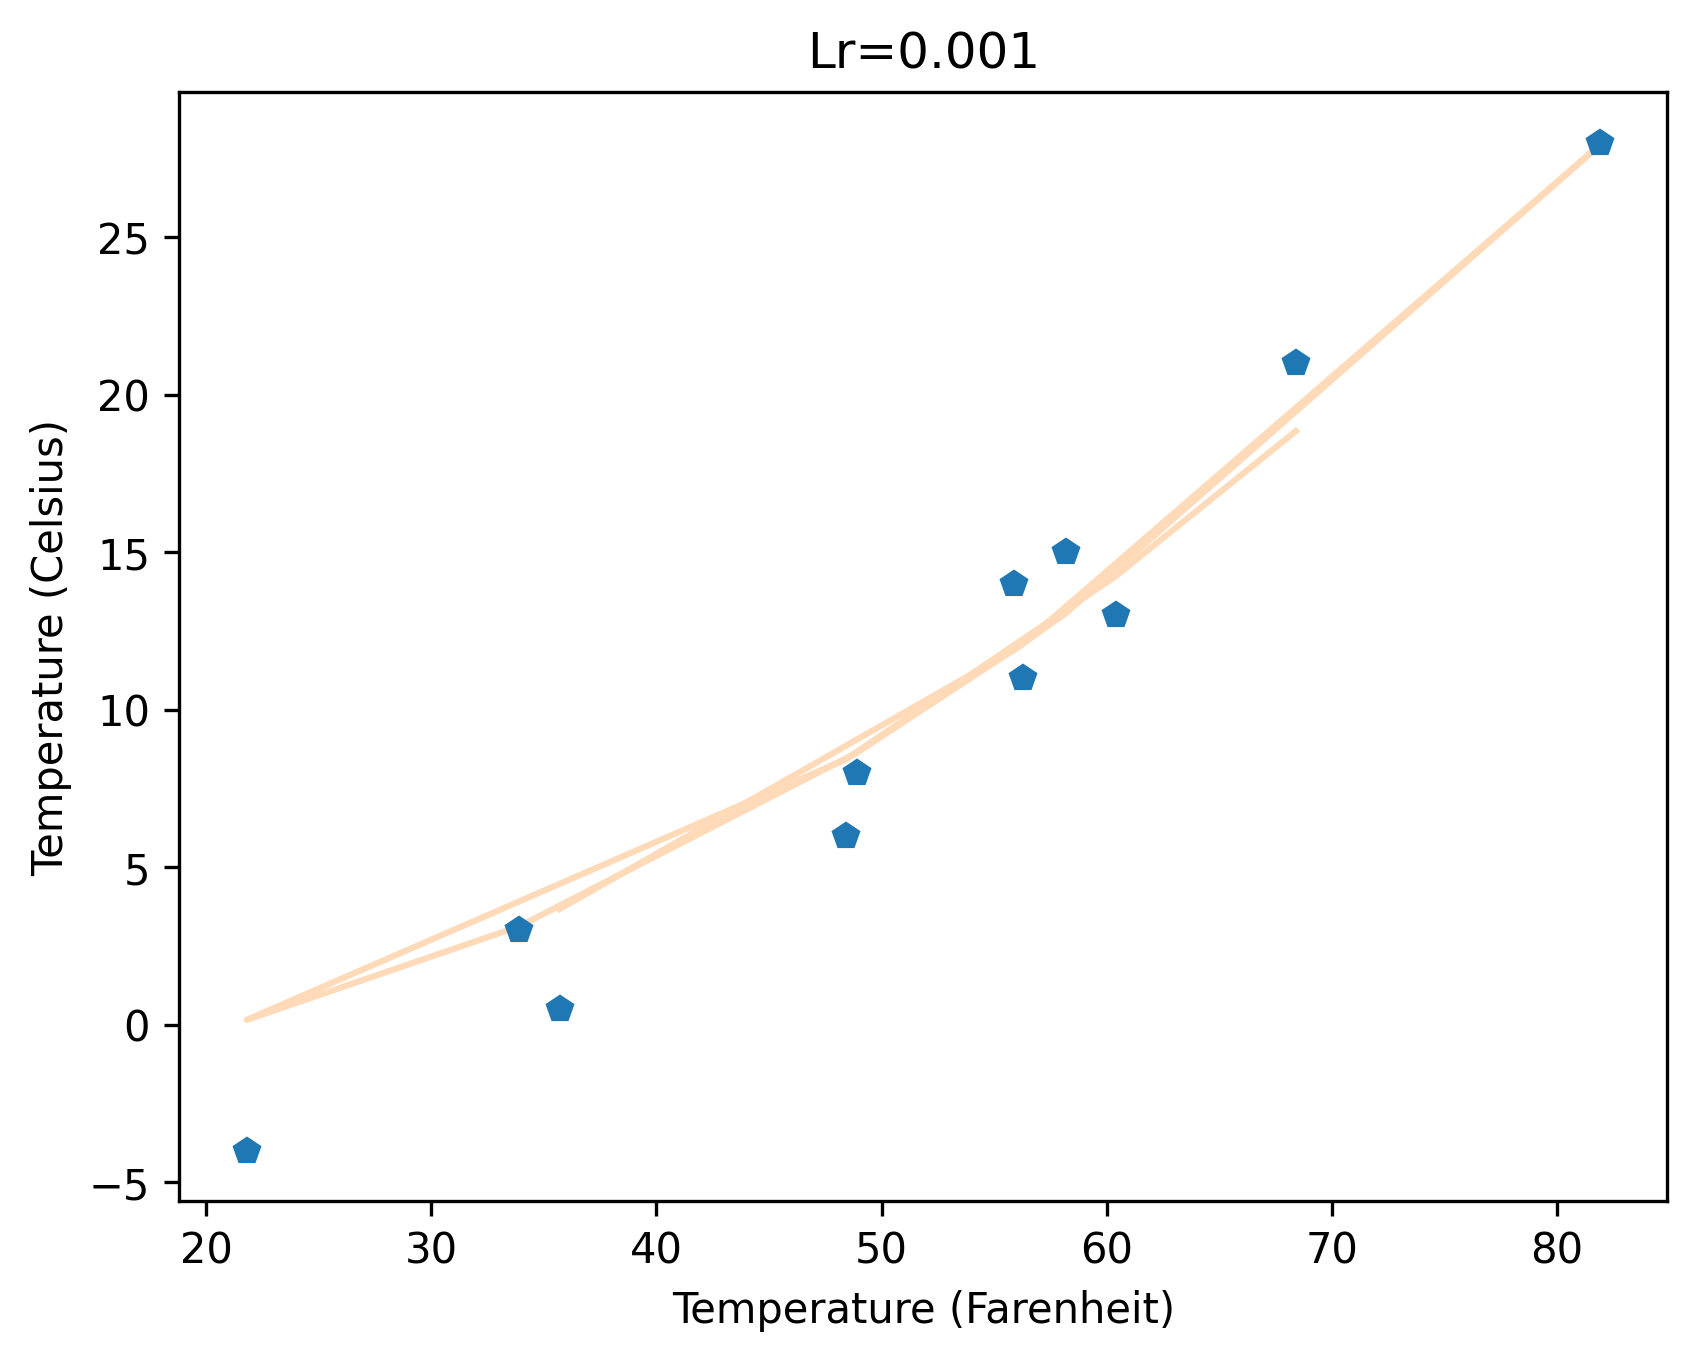

In [ ]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

from matplotlib import pyplot as plt
#t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=300)
plt.title("Lr=0.001")

plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='peachpuff',)
plt.plot(t_u.numpy(), t_c.numpy(), 'p')

Epoch 1, Training loss 703.1406, Validation loss 552.7359
Epoch 500, Training loss 601.3101, Validation loss 474.5243
Epoch 1000, Training loss 510.5079, Validation loss 404.6337
Epoch 1500, Training loss 429.8103, Validation loss 342.3686
Epoch 2000, Training loss 358.2806, Validation loss 287.0226
Epoch 2500, Training loss 295.1557, Validation loss 238.0201
Epoch 3000, Training loss 239.8073, Validation loss 194.8885
Epoch 3500, Training loss 191.7103, Validation loss 157.2344
Epoch 4000, Training loss 150.4084, Validation loss 124.7177
Epoch 4500, Training loss 115.4855, Validation loss 97.0306
Epoch 5000, Training loss 86.5386, Validation loss 73.8772


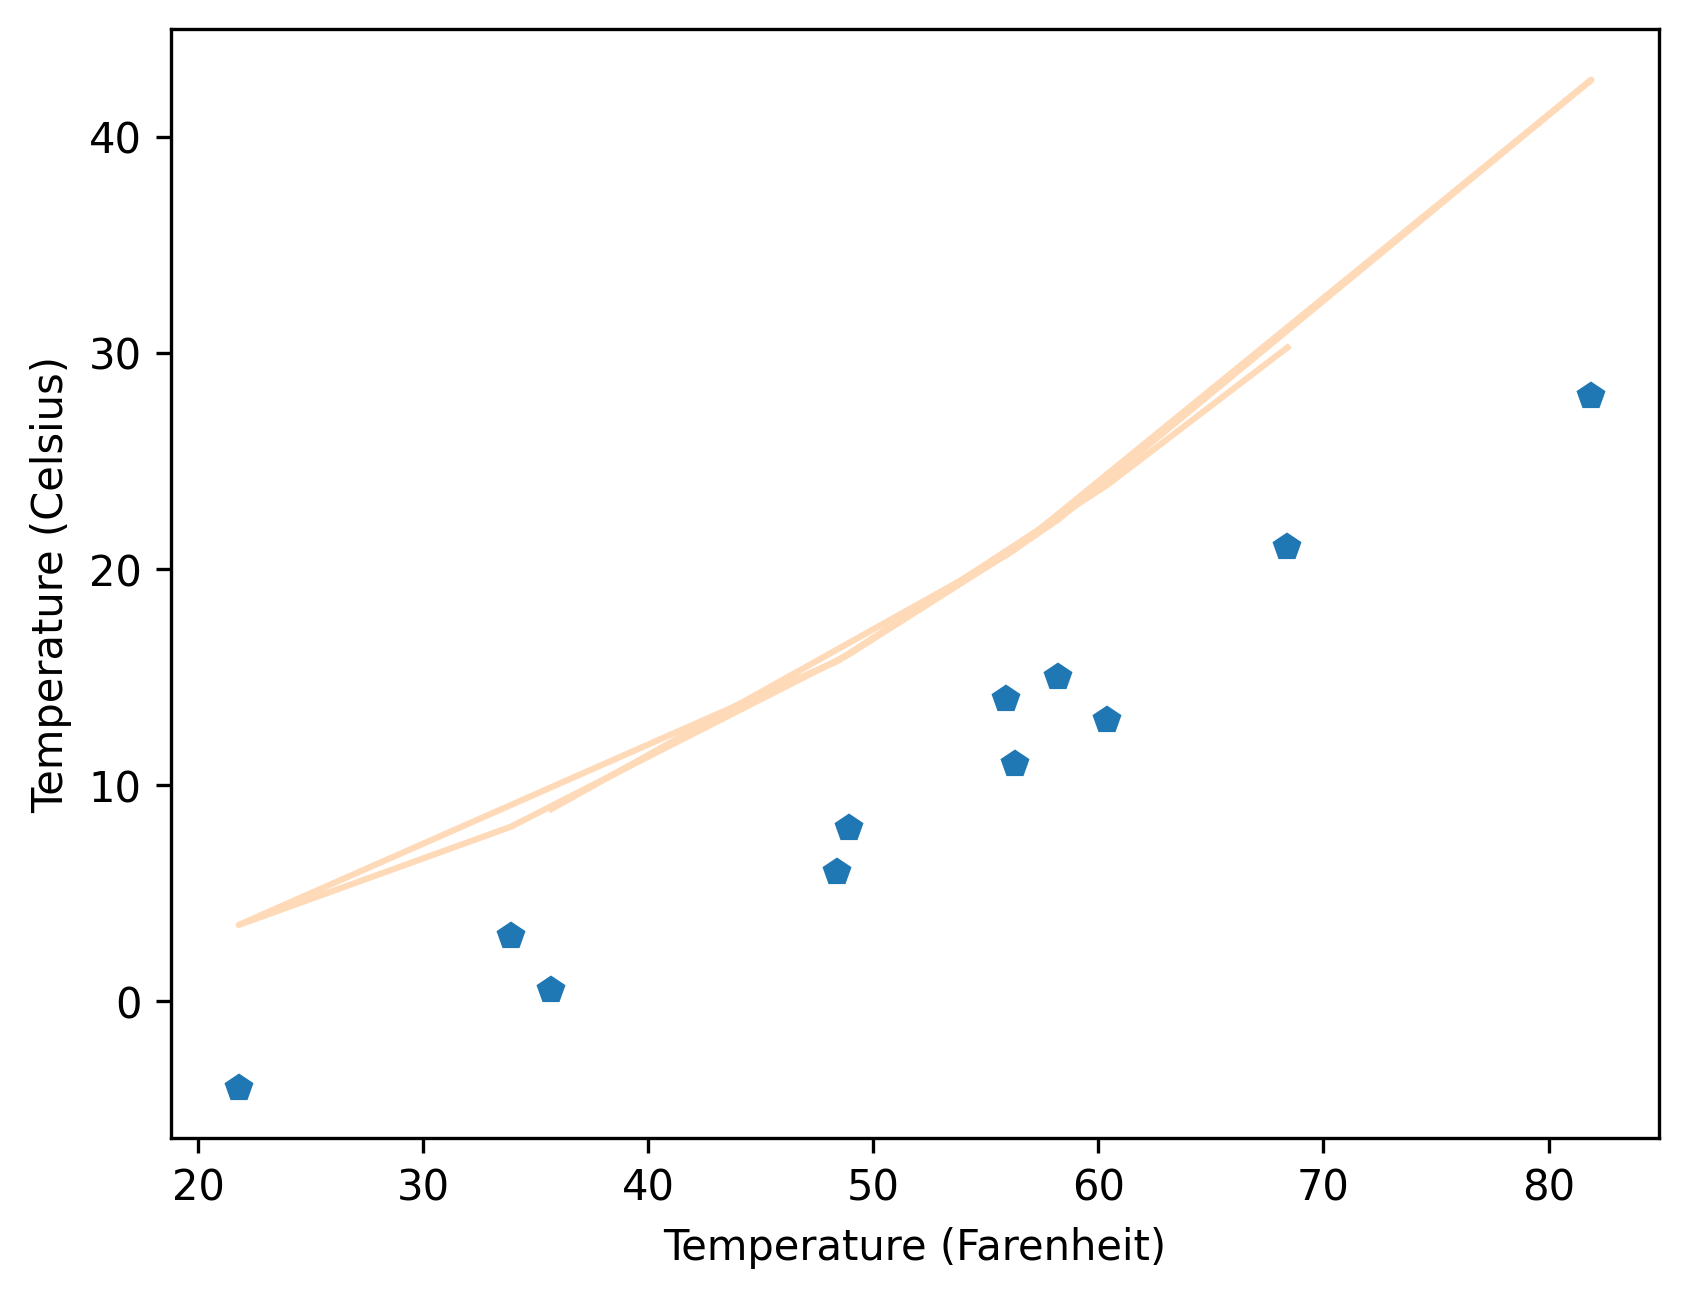

In [ ]:
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

t_p = model(t_un, *params)
fig = plt.figure(dpi=300)
plt.title("0.0001")
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='peachpuff',)
plt.plot(t_u.numpy(), t_c.numpy(), 'p')

**Problem 1C**

The best-performing model is the one with a learning rate of 0.1, as it achieves the lowest validation loss. Overall, non-linear models are preferred due to their consistently smaller validation losses compared to linear alternatives.